# SQL Queries, Analysis and Visualization
This notebook is intended to provide an overview of SQL - queries, functions, keywords and concepts, and to demonstrate how SQLite3 queries can be executed using Python in a notebook environment.

The notebook is beginner friendly and queries become progressively more complicated, starting from the SQL fundamentals. The SQL implementation used for this notebook is SQLite3, however, note that different implementations of SQL (MySQL, Oracle, PosgreSQL etc.) use different syntax, therefore, you should refer to the documentation of the specific SQL implementation you are using. Although the syntax differs across platforms, the concepts of using the SQL language are the same, so you can benefit from understanding different SQL implementations.

The database used is the SQLite version of the Sakila Sample Database, which is an excellent dataset for practicing SQL. You can find detailed information about the database [here](https://www.kaggle.com/atanaskanev/sqlite-sakila-sample-database).

# Table of Contents
Click on any heading to jump straight to the content

[<font size="5">Preparation</font>](#subsection-one)
* [SQL Overview](#subsection-one)
* [Importing libraries](#subsection-two)
* [Connecting to the database](#subsection-three)

[<font size="5">SQL Basics</font>](#section-two)
* [Querying a specific table](#subsection-four)
* [Basic SQL Functions](#subsection-five)
* [COUNT()](#subsection-six)
* [MIN(), MAX(), AVERAGE() and Aggregation](#subsection-seven)

[<font size="5">More functions, keywords and concepts (examples)</font>](#section-three)
* [How many movies are there in each rating category?](#subsection-eight)
* [What is the total number of movies in each category held in inventory?](#subsection-nine)
* [Which movies of rating 'PG' are held in highest quantity in the inventory?](#subsection-ten)
* [What movies has each actor starred in and who has starred in the most movies?](#subsection-eleven)
* [Overdue rentals](#subsection-twelve)
* [Payments per rental, payments per date, payments per store](#subsection-thirteen)

[<font size="5">Demonstration of Python's merge - equivalent to SQL's JOIN</font>](#section-four)
* [Which movies of rating 'PG' are held in highest quantity in the inventory? (Python version)](#subsection-fourteen)

<a id="subsection-one"></a>
## SQL Overview

SQL is the language used to interact with relational databases. Relational databases store data in tables (rows and columns), which are connected to each other based on some relationship, hence "relational". There is a huge variety of online sources to learn about SQL, so I will not go into all the details. I refer you to this [short 4-minute video](https://www.youtube.com/watch?v=27axs9dO7AE) if you want a quick overview of SQL.

There are a few things I want to mention:
* First, readability is very important when writing SQL and especially when queries become longer and more complicated. Thefore, it is a good practice to have all SQL keywords capitalized, so they can be easiliy distinguished from column names or tables.
* It is also a good practice to include ; at the end of the SQL queries, even if the specific SQL implementation does not require it. For example, SQLite3, which is used in this notebook does not require ; at the end of the queries, but it is still placed.
* The order of SQL clauses is important and if clauses are not ordered as required in a query(e.g. placing WHERE after GROUP BY), this will produce an error. Here is a list with the order in which SQL clauses are to be used. Note that the list does not include all the possible clauses, only those used in this notebook:
<center>
 <br>SELECT<br>
FROM<br>
JOIN ON<br>
WHERE<br>
GROUP BY<br>
HAVING<br>
ORDER BY<br>
LIMIT
;

<a id="subsection-two"></a>
### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 50 # maximum number of rows to display

<a id="subsection-three"></a>
### Connecting to the database

In [3]:
database_path = "../input/sqlite-sakila-sample-database/sqlite-sakila.db"

In [4]:
connection = sqlite3.connect(database_path)

We can now query the database directly in this environment using pandas' read_sql method.
We will first see what tables are available in the dataset. This can be done by accessing the sqlite_master table, which is a table containing the information about the database schema. The * in the `SELECT` clause is used to select all rows, the `FROM` clause specifies which table to select from, and the WHERE clause filters the rows to display only those whose 'type' column is table:

In [5]:
tables = pd.read_sql("""

SELECT *
FROM sqlite_master
WHERE type = 'table';

""", connection)

tables

,type,name,tbl_name,rootpage,sql
0,table,actor,actor,2,CREATE TABLE actor (\n actor_id numeric NOT N...
1,table,country,country,5,CREATE TABLE country (\n country_id SMALLINT ...
2,table,city,city,7,"CREATE TABLE city (\n city_id int NOT NULL,\n..."
3,table,address,address,10,CREATE TABLE address (\n address_id int NOT N...
4,table,language,language,13,CREATE TABLE language (\n language_id SMALLIN...
5,table,category,category,15,CREATE TABLE category (\n category_id SMALLIN...
6,table,customer,customer,19,CREATE TABLE customer (\n customer_id INT NOT...
7,table,film,film,24,"CREATE TABLE film (\n film_id int NOT NULL,\n..."
8,table,film_actor,film_actor,28,CREATE TABLE film_actor (\n actor_id INT NOT ...
9,table,film_category,film_category,33,CREATE TABLE film_category (\n film_id INT NO...


<a id="section-two"></a>
## SQL Basics

<a id="subsection-four"></a>
### Querying a specific table
Let's check what data the actor table contains:

In [6]:
pd.read_sql("""

SELECT *
FROM actor;

""", connection)

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2,NICK,WAHLBERG,2021-03-06 15:51:59
2,3,ED,CHASE,2021-03-06 15:51:59
3,4,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59
...,...,...,...,...
195,196,BELA,WALKEN,2021-03-06 15:52:00
196,197,REESE,WEST,2021-03-06 15:52:00
197,198,MARY,KEITEL,2021-03-06 15:52:00
198,199,JULIA,FAWCETT,2021-03-06 15:52:00


And the film table:

In [7]:
pd.read_sql("""

SELECT *
FROM film;

""", connection)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08


Or if we wanted to access only specific columns, we could specify this in the `SELECT` clause. I prefer  placing the comma sign at the beginning of each new specified column to make it clear that this is selecting a field instead of calling a new clause, but this is simply personal preference. You can place the comma signs at the end of each row. Indentation also improves readability, so it is a good practice to use it as appropriate:

In [8]:
pd.read_sql("""

SELECT 
    payment_id
    ,payment_date
    ,amount
FROM payment;

""", connection)

,payment_id,payment_date,amount
0,1,2005-05-25 11:30:37.000,2.99
1,2,2005-05-28 10:35:23.000,0.99
2,3,2005-06-15 00:54:12.000,5.99
3,4,2005-06-15 18:02:53.000,0.99
4,5,2005-06-15 21:08:46.000,9.99
...,...,...,...
16044,16045,2005-08-21 17:43:42.000,4.99
16045,16046,2005-08-21 21:41:57.000,1.99
16046,16047,2005-08-23 06:09:44.000,8.99
16047,16048,2005-08-23 11:08:46.000,2.99


Note that the payment table contains 16049 rows.

<a id="subsection-five"></a>
## Basic SQL Functions

<a id="subsection-six"></a>
### COUNT()
We can use `COUNT()` to count the number of rows in a certain table or a specific column:

In [9]:
pd.read_sql("""

SELECT COUNT(*)
FROM payment;

""", connection)

,COUNT(*)
0,16049


We already knew that the payment table contians 16049 rows, but let's investigate a bit furher. We can `COUNT()` the number of rows in a specific column:

In [10]:
pd.read_sql("""

SELECT COUNT(rental_id)
FROM payment;

""", connection)

,COUNT(rental_id)
0,16044


We can see that this returns 16044 rows, which is with 5 lower than the previous query. This is because the `COUNT()` function excludes any missing values, that is NULL values, so it appears that there are 5 payments, which do not have a corresponding rental recorded in the database. Let us see how large these payments are. For this purpose, we will use `WHERE` clause and match values which are NULL as follows:

In [11]:
pd.read_sql("""

SELECT *
FROM payment
WHERE rental_id IS NULL;

""", connection)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,424,16,1,None,1.99,2005-06-18 04:56:12.000,2021-03-06 15:56:00
1,7011,259,2,None,1.99,2005-08-23 06:13:16.000,2021-03-06 15:56:55
2,10840,401,1,None,0.99,2005-07-12 06:26:10.000,2021-03-06 15:57:27
3,14675,546,1,None,3.99,2005-07-30 21:16:20.000,2021-03-06 15:57:58
4,15458,577,2,None,0.99,2005-05-27 00:46:39.000,2021-03-06 15:58:04


We can see these are only small payments and the None values in the rental_id column.

Now, caution is required when using `COUNT()` and IS NULL together, because queries including both these clauses might lead to confusion if not understood properly.

In the rental table when a rented film has not been returned yet, this is represented with a NULL value in the return_date column, logically.

One might assume that `COUNT()` can be used to retrieve the number of missing values in this column to check how many movies are currently in customers, but note what happens if `COUNT()` and IS NULL are used together: 


In [12]:
pd.read_sql("""

SELECT return_date 
FROM rental
WHERE return_date IS NULL;

""", connection)

,return_date
0,None
1,None
2,None
3,None
4,None
...,...
178,None
179,None
180,None
181,None


In [13]:
pd.read_sql("""

SELECT COUNT(return_date)
FROM rental
WHERE return_date IS NULL;

""", connection)

,COUNT(return_date)
0,0


This returns 0 and one might wrongly conclude that no movies are currently out on rent.

However, when instead of counting the rows in the return_date column specifically, we count the rows of the entire table using `COUNT(*)` we get a different result, as shown below.

This is the apporopriate way to go about it, because `WHERE return_date IS NULL` already guarantees that we are counting rows with missing values in the return_date column:

In [14]:
pd.read_sql("""

SELECT COUNT(*) 
FROM rental
WHERE return_date IS NULL;

""", connection)

,COUNT(*)
0,183


As we can see, 183 films are currently out on rent

<a id="subsection-seven"></a>
### MIN(), MAX(), AVERAGE() and Aggregation

Let's have a look at the film table and see what the minimum and maximum lengths for a movie in each rating category are.

One way to go about this is to query the table for `MIN(length)` and `MAX(length)` of each rating category (for example 'PG') using a `WHERE` clause:

In [15]:
pd.read_sql("""

SELECT
    rating
    ,MIN(length)
    ,MAX(length)
    ,AVG(length)
FROM film
WHERE rating = 'PG';

""", connection)

,rating,MIN(length),MAX(length),AVG(length)
0,PG,46,185,112.005155


However, using this method to chech all the categories, one would have to call a number of queries equal to the number of categories, which might be a huge number. 

Instead, we can group films of different categories together based on their category and call functions which will work on the different groups separately. Here, we will look at an example using `MIN()`, `MAX()` and `AVG()` on the different rating category groups. For this purpose, we use a `GROUP BY` clause:

In [16]:
pd.read_sql("""

SELECT 
    rating
    ,MIN(length)
    ,MAX(length)
    ,ROUND(AVG(length), 0) AS Average
FROM film
GROUP BY rating;

""", connection)

,rating,MIN(length),MAX(length),Average
0,G,47,185,111.0
1,NC-17,46,184,113.0
2,PG,46,185,112.0
3,PG-13,46,185,120.0
4,R,49,185,119.0


This is much quicker and automatically shows us the results for all groups present in the data, instead of us having to manually call functions on each individual group.

Something else you can see from the example is the `AS` keyword. This is used to rename the displayed column or what is known as creating an 'alias'. This helps with readability and can significantly help when writing more complex queries (more on this later).

<a id="section-three"></a>
## More functions, keywords and concepts

Let's now look at some more examples of queries, which will introduce concepts such as ordering, JOINs, subqueries, dates, rounding and more.

<a id="subsection-eight"></a>
### How many movies are there in each rating category?
To answer this question we will once again group by the film's rating and `COUNT()` how many films are in each category. Notice the `ORDER BY` clause, combined with the `DESC` keyword, which stands for "descending". This is used to order the results in the query by the Count with the highest count at the top. Also notice the use of aliases to give our results columns appropriate names. We save the query in a variable `films_per_rating` to use it for visualising.

In [17]:

films_per_rating = pd.read_sql("""

SELECT 
    rating AS Rating
    ,COUNT(title) AS Count
FROM film
GROUP BY rating
ORDER BY Count DESC

""", connection)

films_per_rating

,Rating,Count
0,PG-13,223
1,NC-17,210
2,R,195
3,PG,194
4,G,178


And we visualize the results using matplotlib:

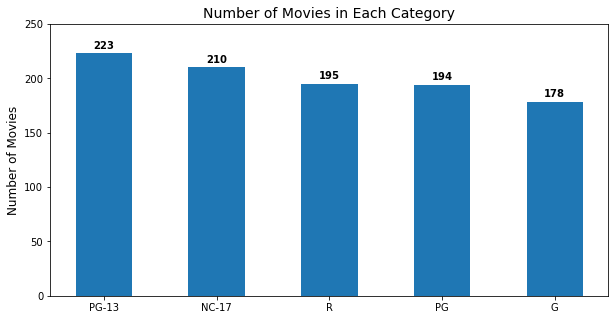

In [18]:
fig, ax = plt.subplots(figsize = (10,5))

ypos = np.arange(len(films_per_rating["Count"]))
bars = ax.bar(ypos, films_per_rating["Count"], width = 0.50)
ax.set_xticks(ypos)
ax.set_xticklabels(films_per_rating["Rating"])
ax.set_ylim(ymax = 250)
ax.set_title("Number of Movies in Each Category", fontsize = 14)
ax.set_ylabel("Number of Movies", fontsize = 12)

for bar in bars: # add data labels
    height = bar.get_height()
    ax.annotate(f"{height}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontweight="semibold")

plt.show()

<a id="subsection-nine"></a>
### What is the total number of movies in each category held in inventory?
To answer this question, we will use a concept known as 'joining' tables, using the `JOIN` keyword. What this basically does, is it takes the values from a column in one table and matches them with the corresponding values from a column in another table, thus creating a new merged table.

There is a plethora of tutorials explaining JOINs, so I will not explain all details and types of JOINs here (like LEFT JOIN, RIGHT JOIN, FULL OUTER JOIN etc.), but I refer you to this short (10-minute) video by [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q), which I found was particularly good at explaining JOINs, the different types of JOINs and visualising how they work: [SQL Joins Explained](https://www.youtube.com/watch?v=9yeOJ0ZMUYw)

In our case, we want to take the film_id from the inventory table and match them with the corresponding film_id from the film table. Then we can access the ratings from the film table and group by them. Note the use of aliases for the tables which shortens the query:

In [19]:

films_in_inv = pd.read_sql("""

SELECT
    rating AS Rating
    ,COUNT(title) AS Count
FROM inventory AS i
JOIN film as f
ON i.film_id = f.film_id
GROUP BY rating
ORDER BY Count DESC

""", connection)

films_in_inv

,Rating,Count
0,PG-13,1018
1,NC-17,944
2,PG,924
3,R,904
4,G,791


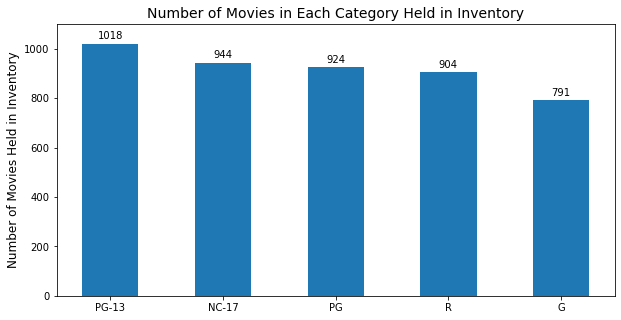

In [20]:
fig, ax = plt.subplots(figsize = (10,5))

ypos = np.arange(len(films_in_inv["Count"]))
bars = ax.bar(ypos, films_in_inv["Count"], width = 0.50)
ax.set_xticks(ypos)
ax.set_xticklabels(films_in_inv["Rating"])
ax.set_ylim(ymax = 1100)
ax.set_title("Number of Movies in Each Category Held in Inventory", fontsize = 14)
ax.set_ylabel("Number of Movies Held in Inventory", fontsize = 12)

for bar in bars: # add data labels
    height = bar.get_height()
    ax.annotate(f"{height}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom")

plt.show()

Although above we saw that there were more R rated movies than there are and PG rated movies (195 vs 194), they change places in this graph, so a higher quanitiy of PG movies are held in inventory relative to R movies (924 vs 904).

<a id="subsection-ten"></a>
### Which movies of rating 'PG' are held in highest quantity in the inventory?
Let's look at one more example, for which we include the `WHERE` clause and the `ORDER BY` takes two arguments: it first orders by the Count from highest to lowest and in case there are movies of the same count, they are ordered alphabetically. Once again, note the order of the clauses:

In [21]:

pd.read_sql("""

SELECT 
    f.title AS Title
    ,COUNT(*) AS Count
    ,f.rating
FROM inventory AS i
JOIN film AS f
ON i.film_id = f.film_id
WHERE rating = 'PG'
GROUP BY f.title
ORDER BY Count DESC, Title ASC;

""", connection)

,Title,Count,rating
0,ACADEMY DINOSAUR,8,PG
1,BOUND CHEAPER,8,PG
2,BUCKET BROTHERHOOD,8,PG
3,EXPENDABLE STALLION,8,PG
4,FROST HEAD,8,PG
...,...,...,...
178,PRIVATE DROP,2,PG
179,PUNK DIVORCE,2,PG
180,RECORDS ZORRO,2,PG
181,TEQUILA PAST,2,PG


<a id="subsection-eleven"></a>
### What movies has each actor starred in and who has starred in the most movies?
To answer these questions, we will need information from 3 tables. In this database the film_actor table is used to show which actor has starred in which movie, but only using the actor_id and film_id. Here we use the `LIMIT 5` keyword to retrieve only the top 5 rows of the film_actor table:

In [22]:
pd.read_sql("""

SELECT *
FROM film_actor
LIMIT 5;

""", connection)

,actor_id,film_id,last_update
0,1,1,2021-03-06 15:52:45
1,1,23,2021-03-06 15:52:45
2,1,25,2021-03-06 15:52:45
3,1,106,2021-03-06 15:52:45
4,1,140,2021-03-06 15:52:45


As we can see, we will have to conduct 2 JOINs on this table to match the actor_id with the corresponding actor name and to match the film_id with the corresponding film title. The || sign is used to concatenate the first and last name of the actor with a space inbetween: 

In [23]:
pd.read_sql("""

SELECT
    f.title AS FilmTitle
    ,a.first_name || ' ' || a.last_name AS Name
FROM film_actor AS fa
JOIN film AS f
ON fa.film_id = f.film_id

JOIN actor AS a
ON fa.actor_id = a.actor_id;

""", connection)

,FilmTitle,Name
0,ACADEMY DINOSAUR,PENELOPE GUINESS
1,ANACONDA CONFESSIONS,PENELOPE GUINESS
2,ANGELS LIFE,PENELOPE GUINESS
3,BULWORTH COMMANDMENTS,PENELOPE GUINESS
4,CHEAPER CLYDE,PENELOPE GUINESS
...,...,...
5457,TELEGRAPH VOYAGE,THORA TEMPLE
5458,TROJAN TOMORROW,THORA TEMPLE
5459,VIRGINIAN PLUTO,THORA TEMPLE
5460,WARDROBE PHANTOM,THORA TEMPLE


Here we have the complete list of film titles matching the actors. Now to answer the second question, we will group by the actor name and count the number of movies they have starred in (we call this Performances):

In [24]:
pd.read_sql("""

SELECT
    a.first_name || ' ' || a.last_name AS Name
    ,COUNT(f.title) AS Performances
FROM film_actor AS fa
JOIN film AS F
ON fa.film_id = f.film_id

JOIN actor AS a
ON fa.actor_id = a.actor_id
GROUP BY f.title
ORDER BY Performances DESC, Name ASC

""", connection)

,Name,Performances
0,WOODY HOFFMAN,15
1,ED CHASE,13
2,HELEN VOIGHT,13
3,JENNIFER DAVIS,13
4,JOHNNY LOLLOBRIGIDA,13
...,...,...
992,REESE WEST,1
993,SISSY SOBIESKI,1
994,TIM HACKMAN,1
995,UMA WOOD,1


One additional keyword I would like to discuss here is `HAVING`. `HAVING` can be used to filter aggregated queries, that is: queries which use GROUP BY. `HAVING` is used in SQL because the `WHERE` keyword cannot be used on aggregated queries. Remember the orded of SQL queries explained above: the `WHERE` keyword comes before GROUP BY and the `HAVING` keyword comes after `GROUP BY`. Let's query only the actors who have starred in movies more than 10 times. The following query is the same as the one above except for the addition of `HAVING Performances > 10`:

In [25]:
pd.read_sql("""

SELECT
    a.first_name || ' ' || a.last_name AS Name
    ,COUNT(f.title) AS Performances
FROM film_actor AS fa
JOIN film AS F
ON fa.film_id = f.film_id

JOIN actor AS a
ON fa.actor_id = a.actor_id
GROUP BY f.title
HAVING Performances > 10
ORDER BY Performances DESC, Name ASC

""", connection)

,Name,Performances
0,WOODY HOFFMAN,15
1,ED CHASE,13
2,HELEN VOIGHT,13
3,JENNIFER DAVIS,13
4,JOHNNY LOLLOBRIGIDA,13
5,NICK WAHLBERG,13
6,SISSY SOBIESKI,13
7,BETTE NICHOLSON,12
8,BETTE NICHOLSON,12
9,ELVIS MARX,12


As we see, this query now returns only 27 rows

<a id="subsection-twelve"></a>
### Overdue rentals 
In our rental table we have the dates when a movie has been rented and the date when it has been returned. Therefore, we can calculate how many days the customer has held the movie and compare this with the maximum rental duration for the movie , in order to see if they have held it more than "allowed" -> was it overdue?

Let's first query this information, before making the comparisons. For the rental and return dates we use the `srtftime()` function to show just the year-month-day i.e. without the exact time. For the holding period we use the `JULIANDAY()` function to calculate the differences between the two dates, because this function calculates fractions of days, which is what we are after in this case. `ROUND()` is used to round the difference to 2 decimal places and `WHERE r.return_date IS NOT NULL` is used because when the return_date is NULL, that means the movie has not been returned yet.

In [26]:
pd.read_sql("""

SELECT
    r.rental_id AS Rental_ID
    ,f.title AS Title
    ,strftime('%Y-%m-%d', r.rental_date) AS Rent
    ,strftime('%Y-%m-%d', r.return_date) AS Return
    ,ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date), 2) AS HoldPeriod
    ,f.rental_duration AS RentalDuration
FROM rental AS r
JOIN inventory AS i ON r.inventory_id = i.inventory_id
JOIN film AS f ON i.film_id = f.film_id
WHERE r.return_date IS NOT NULL;

""", connection)

,Rental_ID,Title,Rent,Return,HoldPeriod,RentalDuration
0,1,BLANKET BEVERLY,2005-05-24,2005-05-26,1.97,7
1,2,FREAKY POCUS,2005-05-24,2005-05-28,3.87,7
2,3,GRADUATE LORD,2005-05-24,2005-06-01,7.96,7
3,4,LOVE SUICIDES,2005-05-24,2005-06-03,9.11,6
4,5,IDOLS SNATCHERS,2005-05-24,2005-06-02,8.23,5
...,...,...,...,...,...,...
15856,16045,COMANCHEROS ENEMY,2005-08-23,2005-08-25,2.06,5
15857,16046,VOYAGE LEGALLY,2005-08-23,2005-08-27,3.82,6
15858,16047,ILLUSION AMELIE,2005-08-23,2005-08-25,1.17,4
15859,16048,HUNCHBACK IMPOSSIBLE,2005-08-23,2005-08-31,7.95,4


Simply going over the results for HoldPeriod and RentalDuration, we can see that there have been overdue rentals.

Let's now calculate the difference between HoldPeriod and RentalDuration and retrive only these rows which show overdue rentals and query the corresponding customers. To query the corresponding customers, we `JOIN` with the customer table as well:

In [27]:
pd.read_sql("""

SELECT
    r.rental_id AS Rental_ID
    ,c.last_name || ', ' || c.first_name AS Name
    ,c.email
    ,f.title As Film
    ,ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date), 2) - f.rental_duration AS Overdue_Days
FROM rental AS r
JOIN inventory AS i ON r.inventory_id = i.inventory_id
JOIN film AS f ON i.film_id = f.film_id
JOIN customer AS c ON r.customer_id = c.customer_id
WHERE r.return_date IS NOT NULL
AND Overdue_Days > 0;

""", connection)

,Rental_ID,Name,email,Film,Overdue_Days
0,3,"MURRELL, MANUEL",MANUEL.MURRELL@sakilacustomer.org,GRADUATE LORD,0.96
1,4,"PURDY, ANDREW",ANDREW.PURDY@sakilacustomer.org,LOVE SUICIDES,3.11
2,5,"HANSEN, DELORES",DELORES.HANSEN@sakilacustomer.org,IDOLS SNATCHERS,3.23
3,7,"WALTERS, CASSANDRA",CASSANDRA.WALTERS@sakilacustomer.org,SWARM GOLD,0.89
4,10,"ISOM, DANNY",DANNY.ISOM@sakilacustomer.org,HANGING DEEP,1.95
...,...,...,...,...,...
8101,16039,"WOOD, LORI",LORI.WOOD@sakilacustomer.org,CAPER MOTIONS,1.90
8102,16040,"SIMS, VANESSA",VANESSA.SIMS@sakilacustomer.org,SCORPION APOLLO,6.17
8103,16043,"SEAL, KARL",KARL.SEAL@sakilacustomer.org,STING PERSONAL,4.20
8104,16048,"HAMILTON, GLADYS",GLADYS.HAMILTON@sakilacustomer.org,HUNCHBACK IMPOSSIBLE,3.95


We can see that a great number of rentals have been overdue, in fact more than half. This might seem like a huge number and an inadequate result, note, however, that this is a simple fictitious sample database, so the data might not be very realisic.

Anyway, let's now see which customers have had the most overdue rentals. Once again, we group by the customer name and use a `COUNT()` function on the grouped data. Note that the Overdue_Days in this case have been used as a filter in the `WHERE` clause:

In [28]:
pd.read_sql("""

SELECT
    c.customer_id AS Customer_ID
    ,c.last_name || ', ' || c.first_name AS Name
    ,c.email
    ,COUNT(*) AS Overdue_Count
FROM rental AS r
JOIN inventory AS i ON r.inventory_id = i.inventory_id
JOIN film AS f ON i.film_id = f.film_id
JOIN customer AS c ON r.customer_id = c.customer_id
WHERE r.return_date IS NOT NULL
AND ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date), 2) - f.rental_duration > 0
GROUP BY Name
ORDER BY Overdue_Count DESC, Name ASC;

""", connection)

,Customer_ID,Name,email,Overdue_Count
0,295,"BATES, DAISY",DAISY.BATES@sakilacustomer.org,28
1,137,"KENNEDY, RHONDA",RHONDA.KENNEDY@sakilacustomer.org,27
2,526,"SEAL, KARL",KARL.SEAL@sakilacustomer.org,27
3,148,"HUNT, ELEANOR",ELEANOR.HUNT@sakilacustomer.org,25
4,469,"BULL, WESLEY",WESLEY.BULL@sakilacustomer.org,24
...,...,...,...,...
594,378,"CULPEPPER, EUGENE",EUGENE.CULPEPPER@sakilacustomer.org,5
595,97,"RUSSELL, ANNIE",ANNIE.RUSSELL@sakilacustomer.org,5
596,586,"STCLAIR, KIRK",KIRK.STCLAIR@sakilacustomer.org,5
597,395,"TURPIN, JOHNNY",JOHNNY.TURPIN@sakilacustomer.org,4


We can see that Daisy Bates has had the most overdue rentals, but if she has had, for example, 1000 rentals, this would be proportionally a small number. Therefore, we would need to calculate the percentage of total rentals, which are overdue. Let's first look at the total rentals per customer. Here we query only the customer_id because we will use this table to JOIN with the table above.

In [29]:
pd.read_sql("""

SELECT 
    customer.customer_id AS Customer_ID
    ,COUNT(*) AS Total_Count
FROM rental
JOIN customer ON rental.customer_id = customer.customer_id
WHERE return_date IS NOT NULL
GROUP BY rental.customer_id
ORDER BY Total_Count DESC;

""", connection)

,Customer_ID,Total_Count
0,148,46
1,526,45
2,144,42
3,236,41
4,197,40
...,...,...
594,248,15
595,61,14
596,110,14
597,281,14


Now let's calculate the percentage of overdue rentals. The following query might seem very long but it is in fact just the same two tables from above used as subqueries and JOINed together. Subqueries are simply the results from one query used in another query. In this case we use two queries, which we JOIN together on the customer_id, and retrieve columns from the resulting JOINed table. In SQL `--` is used for comments and I have used `-- FISRT TABLE` and `-- SECOND TABLE` to highlight where the tables start.

In [30]:
pd.read_sql("""

SELECT
    Overdue_Table.Name
    ,Overdue_Table.email
    ,ROUND(Overdue_Table.Overdue_Count * 1.0 / Total_Table.Total_Count, 2) AS PercentOverdue

-- FIRST TABLE
FROM (SELECT 
    customer.customer_id AS Customer_ID
    ,COUNT(*) AS Total_Count
FROM rental
JOIN customer ON rental.customer_id = customer.customer_id
WHERE return_date IS NOT NULL
GROUP BY rental.customer_id
ORDER BY Total_Count DESC) AS Total_Table

--SECOND TABLE
JOIN (SELECT
    c.customer_id AS Customer_ID
    ,c.last_name || ', ' || c.first_name AS Name
    ,c.email
    ,COUNT(*) AS Overdue_Count
FROM rental AS r
JOIN inventory AS i ON r.inventory_id = i.inventory_id
JOIN film AS f ON i.film_id = f.film_id
JOIN customer AS c ON r.customer_id = c.customer_id
WHERE r.return_date IS NOT NULL
AND ROUND(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date), 2) - f.rental_duration > 0
GROUP BY Name
ORDER BY Overdue_Count DESC, Name ASC) AS Overdue_Table
ON Total_Table.Customer_ID = Overdue_Table.Customer_ID
ORDER BY PercentOverdue DESC;

""", connection)

,Name,email,PercentOverdue
0,"SCHULER, KEVIN",KEVIN.SCHULER@sakilacustomer.org,0.86
1,"MCCARTNEY, JESUS",JESUS.MCCARTNEY@sakilacustomer.org,0.83
2,"TIRADO, LONNIE",LONNIE.TIRADO@sakilacustomer.org,0.78
3,"BATES, DAISY",DAISY.BATES@sakilacustomer.org,0.76
4,"MEEK, ANTONIO",ANTONIO.MEEK@sakilacustomer.org,0.75
...,...,...,...
594,"CULPEPPER, EUGENE",EUGENE.CULPEPPER@sakilacustomer.org,0.26
595,"STCLAIR, KIRK",KIRK.STCLAIR@sakilacustomer.org,0.26
596,"CHRISTENSON, NELSON",NELSON.CHRISTENSON@sakilacustomer.org,0.25
597,"TURPIN, JOHNNY",JOHNNY.TURPIN@sakilacustomer.org,0.21


We see very big numbers for overdue percentages, but once again, I remind you that this is a fictitious sample database, so the data is likely unrealisic. Note that even though Daisy Bates had the highest number of overdue rentals, she is fourth when percentages of overdue rentals are considered.

<a id="subsection-thirteen"></a>
### Payments per rental, payments per date, payments per store
Since we saw that there have been a lot of overdue rentals, let's now check if there have been extra payments or overdue taxes in cases when a movie has been returned after the maximum rental duration.

Here we use a `LEFT JOIN` because we want to return all payments even if for some reason they are not associated with a rental. Let's group by rental to see if there have been multiple payments for 1 rental:

In [31]:
pd.read_sql("""

SELECT 
    r.rental_id
    ,COUNT(*) AS Count_Payments
FROM payment AS p
LEFT JOIN rental AS r
ON p.rental_id = r.rental_id
GROUP BY p.rental_id
ORDER BY Count_Payments DESC
LIMIT 10;

""", connection)

,rental_id,Count_Payments
0,NaN,5
1,16049.0,1
2,16048.0,1
3,16047.0,1
4,16046.0,1
5,16045.0,1
6,16044.0,1
7,16043.0,1
8,16042.0,1
9,16041.0,1


As we see, there haven't been multiple payments for one rental and hence no extra has been charged for overdue rentals. Once again, note that this is a sample database. The count of 5 for the NaN are simply the rows we retrieved in an earlier query.

Let's now calculate the total payments i.e. sales for each month. We use `strftime()` to retrieve only the year and month and use the `SUM()` function on the data grouped by Date:

In [32]:
sales_per_month = pd.read_sql("""

SELECT  
    strftime('%Y-%m', payment_date) AS Date
    ,ROUND(SUM(amount), 0) AS Sales
FROM payment
GROUP BY Date
ORDER BY Date ASC

""", connection)

sales_per_month

,Date,Sales
0,2005-05,4824.0
1,2005-06,9632.0
2,2005-07,28374.0
3,2005-08,24072.0
4,2006-02,514.0


What we see is that there is data only for May, June, July and August 2005 and February 2006. Perhaps the stores were being renovated and hence the business operations were closed for several months and reopened in February 2006, which is considered the "present" date.

Let's now visualise these results, excluding the last row for February 2006:

In [33]:
sales_per_month = sales_per_month.iloc[0:4].set_index("Date") # drop the last row and make Date the index

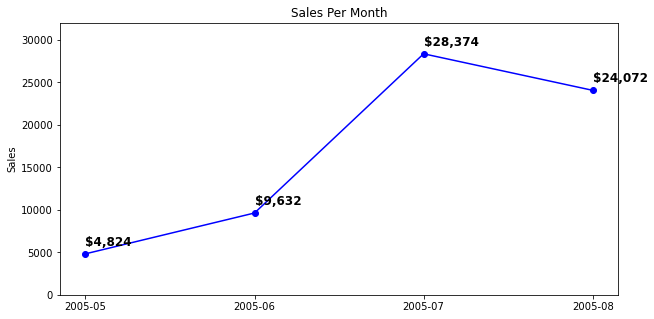

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(sales_per_month,"bo-")
ax.set_ylim(ymin = 0, ymax = 32000)
ax.set_title("Sales Per Month")
ax.set_ylabel("Sales")

for date, sales in sales_per_month["Sales"].items():
    ax.annotate(str("${:,.0f}".format(sales)),
                xy=(date, sales+1000),
               fontweight = "semibold",
               fontsize = 12)

plt.show()

Finally, since there are two stores, let's see how much sales each store has generated:

In [35]:
sales_per_store = pd.read_sql("""

SELECT  
    s.store_id
    ,ROUND(SUM(p.amount), 0) AS Sales
FROM payment AS p
JOIN staff AS s
ON p.staff_id = s.staff_id
GROUP BY p.staff_id

""", connection).set_index("store_id")

sales_per_store

,Sales
store_id,
1,33489.0
2,33927.0


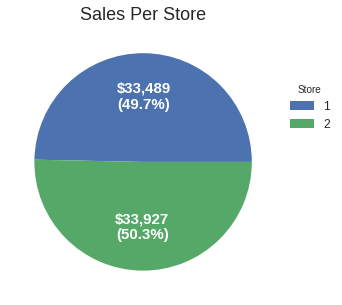

In [36]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (10,5))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "${:,.0f}\n({:.1f}%)".format(absolute, pct)


wedges, texts, autotexts = ax.pie(sales_per_store["Sales"],
       labels = sales_per_store.index,
       autopct=lambda pct: func(pct, sales_per_store["Sales"]),
       textprops=dict(color="w", fontsize = 15, fontweight = "semibold"))
ax.legend(wedges, sales_per_store.index,
          title="Store",
          fontsize = 12,
          loc="center left",
          bbox_to_anchor=(1, 0.2, 0.5, 1))
ax.set_title("Sales Per Store", fontsize = 18)
plt.rcParams['legend.title_fontsize'] = 18


plt.show()

<a id="section-four"></a>
## Demonstration of Python's merge - equivalent to SQL's JOIN
Finally, I want to show you the equivalent way to `JOIN` tables in Python. We will again answer a question from above, this time in Python:

<a id="subsection-fourteen"></a>
### Which movies of rating 'PG' are held in highest quantity in the inventory? (Python version)
First get the inventory_id and film_id from the inventory table:

In [37]:
table1 = pd.read_sql("""

SELECT 
    inventory_id
    ,film_id
FROM inventory;

""", connection)

table1.head(10)

,inventory_id,film_id
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,2
9,10,2


In [38]:
table2 = pd.read_sql("""

SELECT 
    film_id
    ,title AS Title
FROM film
WHERE rating = 'PG'; 

""", connection)

table2

,film_id,Title
0,1,ACADEMY DINOSAUR
1,6,AGENT TRUMAN
2,12,ALASKA PHANTOM
3,13,ALI FOREVER
4,19,AMADEUS HOLY
...,...,...
189,980,WIZARD COLDBLOODED
190,983,WON DARES
191,985,WONDERLAND CHRISTMAS
192,987,WORDS HUNTER


We will now use Python's merge() function to JOIN these two tables on a specified column, in this case film_id.
In case the names of the columns are different in the two tables, we can specify left_on and right_on.

In [39]:
table3 = table1.merge(table2, on = "film_id", how ="inner").drop("film_id", axis = 1)
# once the merge is done on the film_id column, it is not needed and is thus dropped
table3.head(20)

,inventory_id,Title
0,1,ACADEMY DINOSAUR
1,2,ACADEMY DINOSAUR
2,3,ACADEMY DINOSAUR
3,4,ACADEMY DINOSAUR
4,5,ACADEMY DINOSAUR
5,6,ACADEMY DINOSAUR
6,7,ACADEMY DINOSAUR
7,8,ACADEMY DINOSAUR
8,26,AGENT TRUMAN
9,27,AGENT TRUMAN


We can now group by the title and get the corresponding count of items. Columns are renamed to create the same table as above.

In [40]:
table3.groupby("Title").count().rename(columns = {"inventory_id": "Count"}).sort_values(by = ["Count", "Title"], ascending=[False, True]).reset_index()

,Title,Count
0,ACADEMY DINOSAUR,8
1,BOUND CHEAPER,8
2,BUCKET BROTHERHOOD,8
3,EXPENDABLE STALLION,8
4,FROST HEAD,8
...,...,...
178,PRIVATE DROP,2
179,PUNK DIVORCE,2
180,RECORDS ZORRO,2
181,TEQUILA PAST,2


We get the same result as above. As we see, JOINing in SQL and merge()ing in Python are equivalent ways to combine data from two tables together.

## Thank you for reading my notebook!
I would appreciate any comments and suggestions regarding the contents of this notebook.

Happy SQL learning!